In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df1 = pd.read_csv('IoTPond2.csv')
df2 = pd.read_csv('IoTpond1.csv')
df1.rename(columns ={'Turbidity (NTU)':'Turbidity(NTU)'})
df = pd.concat([df1,df2])

In [3]:
pH_min = 6
pH_max = 8
temp_min = 10
temp_max = 40
Am_min = 0
Am_max = 3

In [5]:
df = df[(df['Ammonia(g/ml)'] >= Am_min) & (df['Ammonia(g/ml)'] <= Am_max) & (df['Temperature (C)'] >= temp_min) & (df['Temperature (C)'] <= temp_max) & (df['PH'] >= pH_min) & (df['PH'] <= pH_max) ]

In [6]:
X = df[['PH','Temperature (C)']]
y = df['Ammonia(g/ml)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#random-forest model
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
rmse = mean_squared_error(y_test, predictions,squared=False)
rmse

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.24681008738018678

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
#gradient boosting machines
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
y_pred3 = gbm_model.predict(X_test)
rmse3 = mean_squared_error(y_test, y_pred3,squared=False)
rmse3

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.28974194659551983

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: U

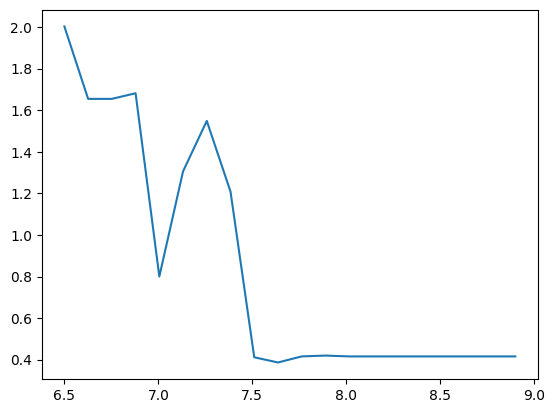

In [27]:
T = 35
pH = [6.5, 6.62631579, 6.75263158, 6.87894737, 7.00526316, 7.13157895,
      7.25789474, 7.38421053, 7.51052632, 7.63684211, 7.76315789, 
      7.88947368, 8.01578947, 8.14210526, 8.26842105, 8.39473684, 
      8.52105263, 8.64736842, 8.77368421, 8.9]
NH3 = []
for x in pH:
    res = (gbm_model.predict([[x,T]])[0] + rf_regressor.predict([[x,T]])[0])*0.5
    NH3.append(res)

plt.plot(pH,NH3)

In [28]:
joblib.dump(gbm_model,'gbm_NH3_model.pkl')

['gbm_NH3_model.pkl']